In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#Defin the class value
class Value:
    
    def __init__(self,data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        out = Value(self.data * other.data,(self, other),'*')
        
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad =  (1 - t*t) * out.grad
        out._backward = _backward
        return out

In [42]:
from graphviz import Digraph

def trace(root):
    
    nodes, edges = set(), set()
    
    def build(v):
        
        if v not in nodes:
            nodes.add(v)
            
            for child in v._prev:
                
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    
    dot = Digraph(format='svg', graph_attr={'%rankdir': 'LR'})
    
    nodes, edges = trace(root)
    
    for n in nodes:
        
        uid = str(id(n))
        
        dot.node(name = uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            
            dot.node(name = uid + n._op, label=n._op)
            
            dot.edge(uid + n._op, uid)
         
    for n1,n2 in edges:
        
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

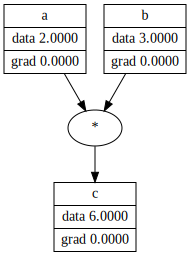

In [43]:
draw_dot(c)

In [44]:
#Write a fuction
#Inputs x1 and x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#Weights w1 and w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(8.0, label='b')

x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

#Return tanh
o = n.tanh(); o.label = 'o'


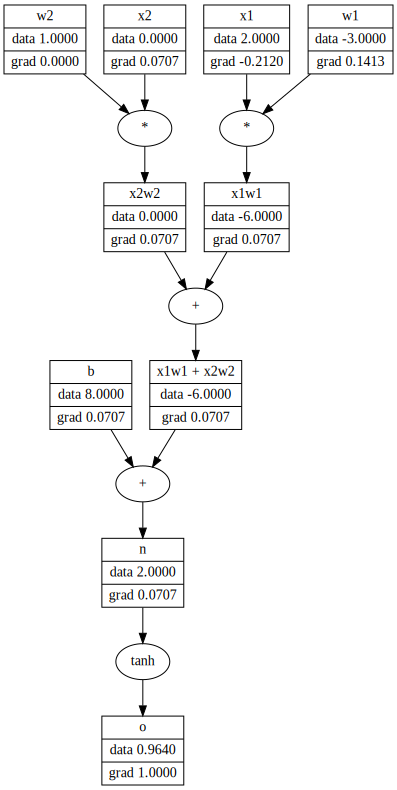

In [55]:
draw_dot(o)

In [56]:
#Automate Backpropagation

topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=8.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=2.0),
 Value(data=0.9640275800758169)]

In [46]:
o.grad = 1.0

In [48]:
o._backward()

In [50]:
n._backward()

In [52]:
x1w1x2w2._backward()

In [54]:
x2w2._backward()
x1w1._backward()